In [1]:
import os,glob
import numpy as np
from scipy import spatial
from IPython.display import Image,display
index,files,findex = [],{},0
for fname in glob.glob("index/*.npy"):
    index.append(np.load(fname))
    for f in file(fname.replace(".feats_pool3.npy",".files")):
        files[findex] = f.strip()
        findex += 1        
index = np.concatenate(index)
print "Files ",len(files),"Index ",index.shape

Files  450386 Index  (450386, 2048)


In [2]:
def download(filename,query,rank):
    try:
        os.mkdir("examples")
    except:
        pass    
    try:
        os.mkdir("examples/{}".format(query))
    except:
        pass    
    os.system("aws s3 cp s3://aub3data/dataset/{} examples/{}/{}.jpg".format(filename.split("/")[-1],query,rank))

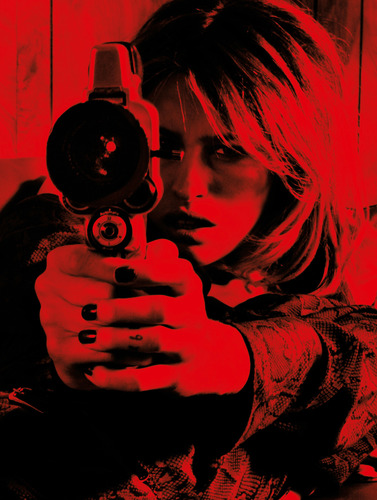

starting
50000
100000
150000
200000
250000
300000
350000
400000
450000
450386
finished
Total Results:  (450386,)
1	Distance	12.33	Filename:	/mnt/dataset/daria_strokous_3026874.jpg


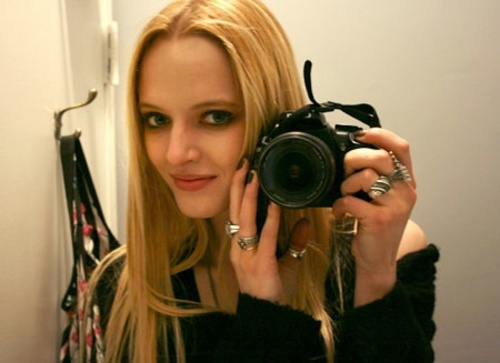

2	Distance	12.53	Filename:	/mnt/dataset/behati_prinsloo_4047379.jpg


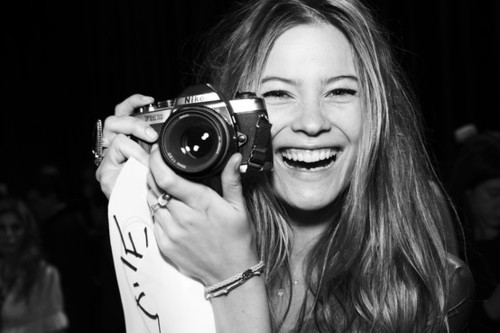

3	Distance	12.79	Filename:	/mnt/dataset/flavia_lucini_8391009.jpg


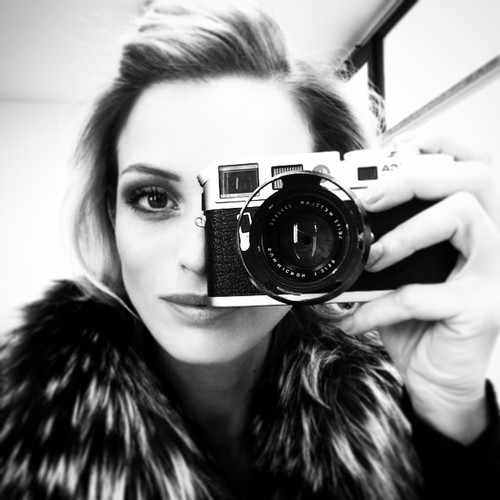

4	Distance	13.54	Filename:	/mnt/dataset/keke_lindgard_7247511.jpg


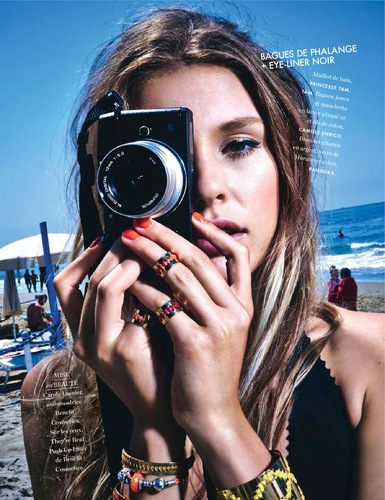

In [4]:
query = 412345 #412345 # 5765 #84126 #39740 #98165
query_vector = index[query][np.newaxis,:]
download(files[query],query,0)
display(Image(filename="examples/{}/{}.jpg".format(query,0)))
print "starting"
temp = []
dist = []
for k in xrange(index.shape[0]):
    temp.append(index[k])
    if (k+1) % 50000 == 0:
        temp = np.transpose(np.dstack(temp)[0])
        print k+1
        dist.append(spatial.distance.cdist(query_vector,temp))
        temp = []
if temp:
    temp = np.transpose(np.dstack(temp)[0])
    print k+1
    dist.append(spatial.distance.cdist(query_vector,temp))
dist = np.hstack(dist)        
print "finished"
ranked = np.squeeze(dist.argsort())
print "Total Results: ",ranked.shape
for i,k in enumerate(ranked[:5]):
    if i: # 0th is the query
        print "{}\tDistance\t{}\tFilename:\t{}".format(i if i else "Query",round(dist[0,k],2),files[k])
        download(files[k],query,i)
        display(Image(filename="examples/{}/{}.jpg".format(query,i)))